# Analysis Relation SII (CVC) in noise & AC  and BC direct thresholds in the situation Sbcd65_Nbest65

1 July 2023 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from scipy.stats import linregress as linregress

In [2]:
def read_AC_thresholds():
    # read measured thresholds
    f_in = '//media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/AC_measured_thresholds.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', inplace=True)
    return df

In [3]:
def present_AC_thresholds():
    ac = read_AC_thresholds()
    ac1 = ac[['AC_500', 'AC_1000', 
              'AC_2000', 'AC_4000']].copy()
    pta = ac1.iloc[:, 1:].mean(axis='columns').round(1)
    ac1.insert(4, column= 'PTA (0.5-4 kHz)', value=pta)
    pta_hf = ac1.iloc[:, 2:].mean(axis='columns').round(1)
    ac1.insert(5, column= 'PTA_HF (1-4 kHz)', value=pta_hf)
    return ac1

In [4]:
def read_BC_direct():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/BCdirect.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df = df.drop(['Unnamed: 0'], axis=1)
    df.set_index('Study_ID', inplace=True)
    return df

In [5]:
def present_BCdirect_thresholds():
    bc = read_BC_direct()
    bc1 = bc[['BCdimp_500', 'BCdimp_1000', 'BCdimp_2000', 'BCdimp_4000']].copy()
    pta = bc1.iloc[:, 1:].mean(axis='columns').round(1)
    bc1.insert(4, column= 'PTA (0.5-4 kHz)', value=pta)
    pta_hf = bc1.iloc[:, 2:].mean(axis='columns').round(1)
    bc1.insert(5, column= 'PTA_HF (1-4 kHz)', value=pta_hf)
    bc1.dropna(inplace=True)
    return bc1

In [6]:
def read_SII():
    f_in =  '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/SII_Sbcd65_Nbest65.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', inplace=True)
    df1 = df['AC&BC_path']
    return df1

In [7]:
# lin. reg. SII combination path (si) function thresholds (df)
def lreg_SII(thr, si):
    l = list(thr.columns)
    d = dict()
    for j in range(6):
        thres = (thr.iloc[:, j]).to_numpy(dtype='float')
        lrgrs = linregress(thres, si)
        r = lrgrs[2]
        r2 = round(r**2, 3)
        r = round(r, 3)
        p = round(lrgrs[3], 3)
        se = round(lrgrs[4], 4)
        print(l[j], 'r square =', r2, ' r =', r, ' p =', p, ' se =', se)
        de = {l[j] : (r, r2)}
        d.update(de)
    df = pd.DataFrame.from_dict(d, orient='index')
    return df

In [8]:
act = present_AC_thresholds()

In [9]:
bct = present_BCdirect_thresholds()

In [10]:
sii = read_SII()

In [11]:
# BAHA5P: relation sii combination path vs. AC thresholds
lr_ac = lreg_SII(act, sii)

AC_500 r square = 0.0  r = -0.02  p = 0.933  se = 0.0028
AC_1000 r square = 0.0  r = 0.001  p = 0.997  se = 0.0035
AC_2000 r square = 0.629  r = 0.793  p = 0.0  se = 0.0015
AC_4000 r square = 0.302  r = 0.549  p = 0.012  se = 0.001
PTA (0.5-4 kHz) r square = 0.468  r = 0.684  p = 0.001  se = 0.0019
PTA_HF (1-4 kHz) r square = 0.548  r = 0.74  p = 0.0  se = 0.0014


In [12]:
# BAHA5P: relation sii combination path vs. BC direct thresholds
lr_bh5_bc = lreg_SII(bct, sii)

BCdimp_500 r square = 0.002  r = -0.047  p = 0.845  se = 0.0029
BCdimp_1000 r square = 0.001  r = 0.038  p = 0.873  se = 0.0021
BCdimp_2000 r square = 0.026  r = 0.162  p = 0.496  se = 0.0021
BCdimp_4000 r square = 0.019  r = 0.137  p = 0.563  se = 0.0015
PTA (0.5-4 kHz) r square = 0.028  r = 0.167  p = 0.482  se = 0.0027
PTA_HF (1-4 kHz) r square = 0.031  r = 0.176  p = 0.458  se = 0.0023


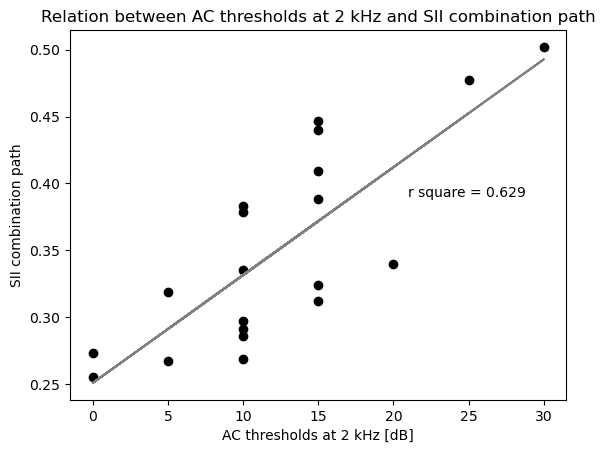

In [13]:
act2k = (act.iloc[:, 2]).to_numpy(dtype='float')
lrgrs = linregress(act2k, sii)
slope = lrgrs[0]
intercept = lrgrs[1]
r2 = round(lrgrs[2]**2, 3)
s = 'r square = '+ str(r2)

plt.scatter(act2k, sii, c='black')
plt.title("Relation between AC thresholds at 2 kHz and SII combination path")
plt.xlabel("AC thresholds at 2 kHz [dB]")
plt.ylabel("SII combination path")
plt.plot(act2k, slope*act2k + intercept, color='grey')
plt.text(21, 0.39, s)
plt.show()

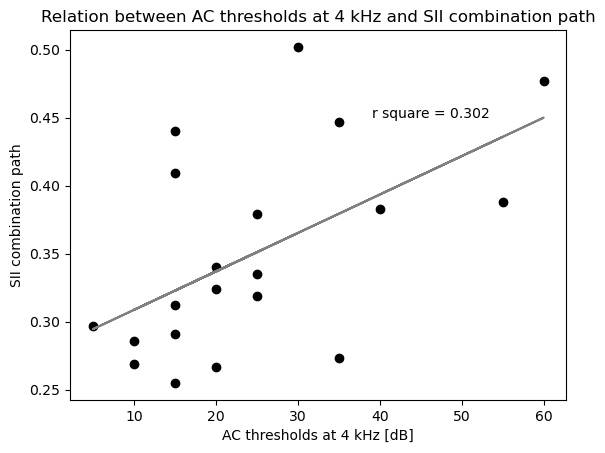

In [14]:
act4k = (act.iloc[:, 3]).to_numpy(dtype='float')
lrgrs = linregress(act4k, sii)
slope = lrgrs[0]
intercept = lrgrs[1]
r2 = round(lrgrs[2]**2, 3)
s = 'r square = '+ str(r2)

plt.scatter(act4k, sii, c='black')
plt.title("Relation between AC thresholds at 4 kHz and SII combination path")
plt.xlabel("AC thresholds at 4 kHz [dB]")
plt.ylabel("SII combination path")
plt.plot(act4k, slope*act4k + intercept, color='grey')
plt.text(39, 0.45, s)
plt.show()